In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from multi_run_v2.initialize_v2 import data_pp, screener

In [3]:
data = pd.read_pickle("Data/cmktcap_data_final.pickle")

cmktcap = data_pp(data=data,
                  vender="coinmarketcap")

In [4]:
mask = screener(cmktcap["mktcap"],
                cmktcap["vol"],
                1_000_000,
                1_000_000,
                ma=True)

In [8]:
mktcap = (mask * cmktcap["mktcap"])

In [11]:
rtn = cmktcap["price"].pct_change(fill_method=None)

In [19]:
weight = mktcap.apply(lambda x: x/np.nansum(x), axis=1).shift(1)

<AxesSubplot:xlabel='date'>

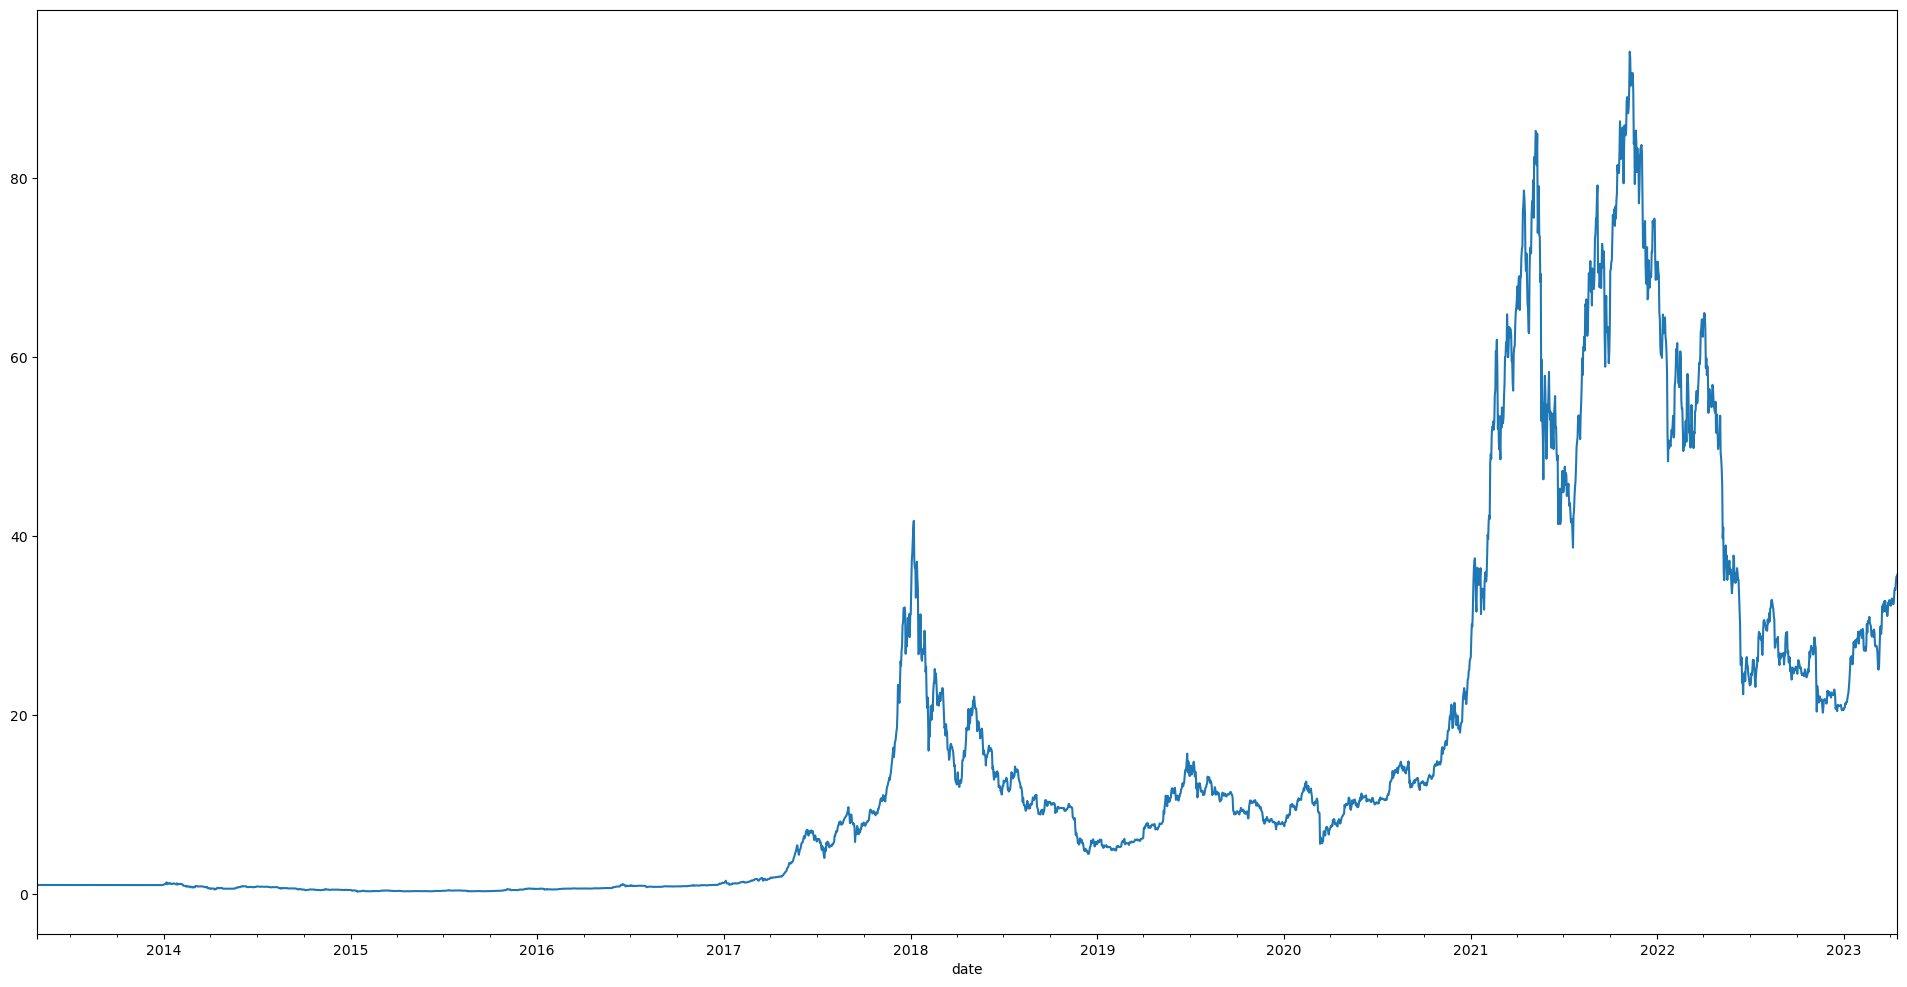

In [20]:
((weight * rtn).sum(1) + 1).cumprod().plot(figsize=(24,12))